In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for clean final report
import wrangle
import explore

# filter out noise
import warnings
warnings.filterwarnings('ignore')

# align markdown tables to the left

In [2]:
%%html
<style>
table {float:left}
</style>

# Anomaly Detection Project

This project is designed to answer key questions from the curriculum log data.

----

## Executive Summary:
Goals
 - Answer direct questions provided
 - Locate and interperate any anomaly occurance in the logs
 
Key Findings
 - Data Science alumni often come back for the fundamentals lesson, insinuating this information needs more review prior to graduation
 - The 2019 shut down of program cross-curriculum-access did not take effect. A data science student was able to access web development curriculum in May 2020
 
Takeaways
 - Students and Alumni can still access other programs information and this needs to be addressed
 - Programs are consistent cohort to cohort on their lessons with very few significant variations
 - Site visits are trending up
 
Recommendations
- Add extra emphasis and focus on spring content for web development students
- Adding in a fundamentals review towards the end of the data science program may mitigate knowledge lost after graduation
- Develop dashboard to update live data to visually display how current cohorts are interacting with the curriculum
- Ensure the server resources can handle added demand as programs continue to grow

---

## 1. Planning
 - Create deliverables:
     - email
     - final_report.ipynb
     - one-slide executive summary
 - Bring over functional wrangle.py and explore.py files
 - Acquire the data from the local CSV's via the acquire function
 - Prepare the data via the prepare function
 - Explore the data and answer the questions. 
 - Document findings and takeaways.
 - Develop and document all findings, takeaways, recommendations and next steps.
 ---

## 2. Data Acquisition

In this step, I call my aquire function from my wrangle.py. This function:
- grabs the data from the locally saved CSVs 
- combines them into one dataframe

#### Data Dictionary

| Feature Name | Type | Description |
| ---- | ---- | ---- |
| page | str | pathway to page |
| user | int | student's user number |
| cohort | int | cohort id number |
| ip | str | ip address |
| name | str | name of cohort |
| start_date | datetime | start date of cohort |
| end_date | datetime | end date of cohort |
| program | str | which program the cohort teaches. Data Science is 3 and the Web Development is split into 1 for PHP, 2 for Java, and 4 for Front End |

In [3]:
# acquire the logs data and the cohort data from local CSVs
df, cohorts = wrangle.acquire()

In [4]:
# look at the shapes of both dataframes
df.shape, cohorts.shape

((900222, 1), (53, 5))

#### Data Acquisition Takeaways
- The data brings in 900,000 log records and data on 53 cohorts across 5 features.
- Foreign key columns will be used to merge the data in the prepare step of the pipeline.
----

## 3. Data Preparation
In this step, I called my prepare function from my wrangle.py. This function:
- splits out and renames columns to be human readable
- moves erroneous ip addresses to the correct column
- handes nulls in cohort data
- merges the log and cohort dataframes
- creates a datetime index using the log entry dates
- feature engineers 'lesson' with the root of the page pathway
- renames lesson names with near-duplicates
- saves a clean version of the CSV locally

In [5]:
# call the prepare function to do the cleaning listed above
# WARNING: THIS TAKES ABOUT 20 MINUTES TO COMPLETE. 
df = wrangle.prepare(df, cohorts)

### Data Preparation Takeaways
- This step is lengthy due to the number of erroneous ip address entries. By saving the clean CSV locally, this will expidite beginning any future exploration.
---

## 4. Data Exploration
#### Question 1: Which lesson appears to attract the most traffic consistently across cohorts for each program?

In [6]:
# look at the results for q1
ds, wd = explore.q1(df)
# look at the data science top lessons first
ds

,lesson,page
73,fundamentals,16691
124,sql,13670
45,classification,11840
111,python,10455
0,,8358


In [7]:
# look at the top lessons for web development 
wd

,lesson,page
541,javascript-i,118711
514,html-css,84909
578,mysql,82311
547,jquery,60865
630,spring,58595


#### Question 1 Takeaway:
- Data Science students visit the fundamentals lesson the most
- Web Development studnets visit the javascript-i lesson the most

---
#### Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

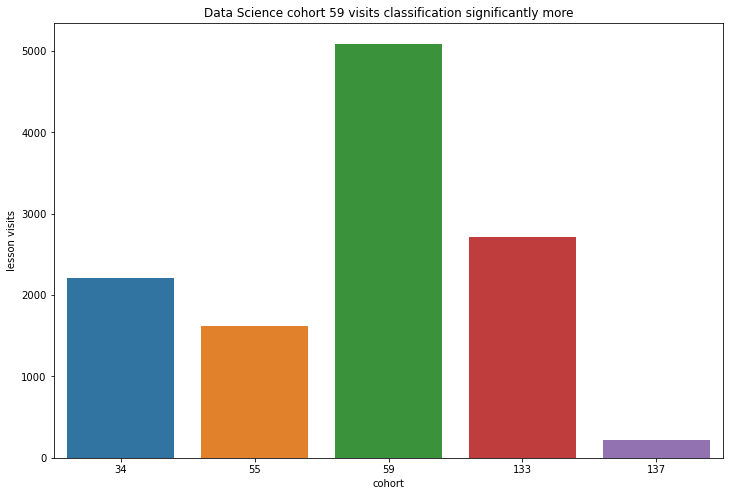

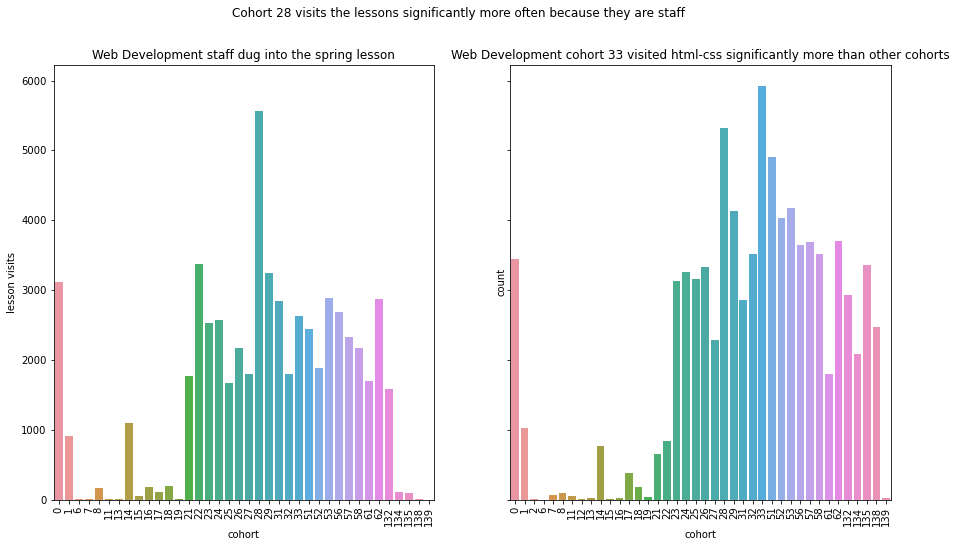

In [8]:
# display the results for q2
explore.q2(df)

#### Question 2 Takeaway:
- Data science Darden (cohort 59) hit classification lesson really hard at about 3000 more visits than the other cohorts
- Web development Staff (cohort 28) has a consistently higher lesson visit count across lessons. This makes sense as this is the staff cohort.
- Web development Ceres (cohort 33) did visit the html-css lesson most frequently but not too significantly due to a cluster of consistently higher visits in following cohorts as well.


---

#### Question 5: At some point in 2019, the ability for students and alumni to access both curriculums should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [9]:
# display the finding for q5
explore.q5(df)[['lesson','user','program_id']]

,lesson,user,program_id
date,,,
2020-05-19,java-ii,590,3.0


#### Question 5 Takeaway:
- The above finding was the latest log entry of a data science student visiting a web development page or vice versa.
- This access was not turned off until at least May of 2020.
- There was no evidence of cross-over access after this date.

---
#### Question 6. What topics are grads continuting to reference after graduation and into their jobs for each program?

In [10]:
# display the results for q6
ds, wd = explore.q6(df)
# look at data science results first
ds

,lesson,visit_count
0,fundamentals,614
1,sql,571
2,regression,519
3,classification,495
4,,491


In [11]:
# look at the web development results
wd

,lesson,visit_count
0,spring,879
1,,516
2,content,513
3,javascript-i,493
4,mysql,491


#### Question 6 Takeaway:
- Data science alumni reference the fundamentals lesson the most after graduation.
- Web Dev alumni reference the spring lesson the most after graduation.

---
#### Questions 7. Which lessons are least accessed?

In [16]:
# display the resutls for q7
ds, wd = explore.q7(df)
# look at the data science results first
ds

,lesson,visit_count
0,fundamentals,16691
1,sql,13670
2,classification,11840
3,python,10455
4,,8358
5,regression,7507
6,stats,6660
7,anomaly-detection,4332
8,clustering,4272
9,appendix,3944


In [18]:
# look at the web development results
wd

,lesson,visit_count
0,javascript-i,110118
1,html-css,79001
2,mysql,77340
3,jquery,56787
4,spring,53149
5,java-iii,52607
6,java-ii,51348
7,java-i,38180
8,javascript-ii,36068


#### Question 7 Takeaway:
- Data science students visit advanced topics and distributed-ml the least at about 1,500-2,000 less than visits than the next least-visited data science lesson 
- Web development students visit javascript-ii and java-i the least at about 12,000 less visits than the next webdev lesson
---

### Interesting find: What is the trend of program visits?

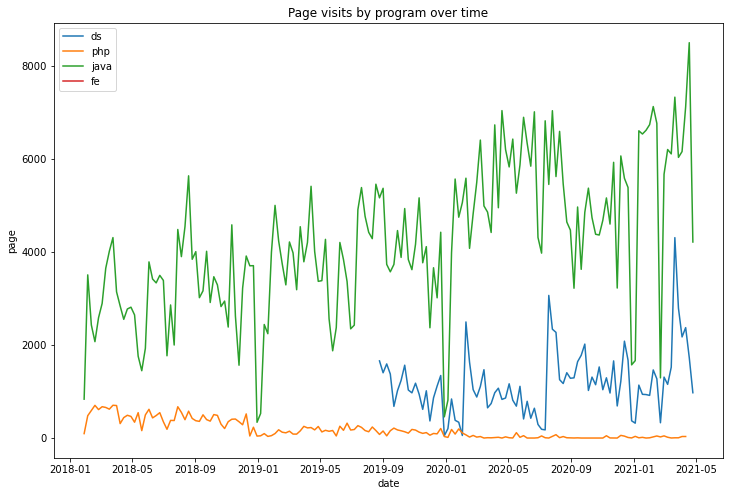

In [15]:
explore.q8(df)

#### Interesting find takeaways:
- All active programs are trending upwards in website visits
- This could eventually reach the server limit
---

### Data Exploration Takeaways:
 - Data Science:
     - visits the fundamentals lesson pages the most
     - Darden cohort (59) had 3,000 more visits in the classification lesson than the other cohorts
     - Alumni reference the fundamentals lesson the most
     - visits the advanced topics and distributed-ml lessons the least with about 1,500-2,000 less visits than the next least visited lesson
 
 - Web Development:
     - visits the javascript-i lesson pages the most
     - Ceres cohort (33) had higher visit counts to html-css lesson, but the following cohorts also held higher visits to this lesson
     - Alumni reference the spring lesson the most
     - visits javascript-ii and java-i the least at about 12,000 less visits than the next least visited lesson
     
 - Access to both sets of lessons was not turned off in 2019. The last finiding of a program student accessing the other program material was in May of 2020.
 
----

## Conclusion
The programs are highly consistent with what material is covered, and this is true very few significant variations. There is value in looking into what our alumni come back to visit, as this could be an indicator of changes in the industry. Similarly, the pages least visited might also be an indicator of contant losing relevancy in the industry.  

### Recommendations
- Adding in more time during the web development program to review spring. With it being the most referenced after graduation, it can be assumed this skill needs more dedicated time or depth in the curriculum
- Adding in a fundamentals review towards the end of the data science program may mitigate knowledge lost after graduation
- Double check that programs are officially shut down from accessing other program's pages. It does not appear the 2019 shut down occured
- Develop dashboard to update live data to visually display how current cohorts are interacting with the curriculum

### Next Steps:
- With more time, I would dig into the other vital questions asked reguarding students who rarely access the curriculum and identifying any potential threats to the online property. 
- Look into server limits as program attendance and cohort timeline overlap continues to trend upwards
- Add page classifiers such as program name or informational page in order to ease future exploration of this data
---